<a href="https://colab.research.google.com/github/Chefmine8/jarvis/blob/main/Neurone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Fonction


In [106]:
def init(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

In [107]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))
  return A

In [108]:
def log_loss(A, y):
  eps = 1e-15
  return 1 / len(y) * np.sum(-y * np.log(A + eps) - (1 - y) * np.log(1 - A + eps))

In [109]:
def gradient(A, X, y):
  dW = 1 / len (y) * np.dot(X.T, A - y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)

In [110]:
def update(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b -learning_rate * db
  return (W, b)

In [111]:
def predict(X, W, b):
  A = model(X, W, b)
  #print(A)
  return A >= 0.5

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
  #initi W, b
  W, b = init(X)

  Loss = []

  for i in range(n_iter):
      A = model(X, W, b)
      Loss.append(log_loss(A, y))
      dW, db = gradient(A, X, y)
      W, b = update(dW, db, W, b, learning_rate)

  y_pred = predict(X, W, b)
  print(accuracy_score(y, y_pred))

  plt.plot(Loss)
  plt.show()

  return (W, b)

## **Exo Plante**

dimensions de x: (100, 2)
dimensions de y: (100, 1)


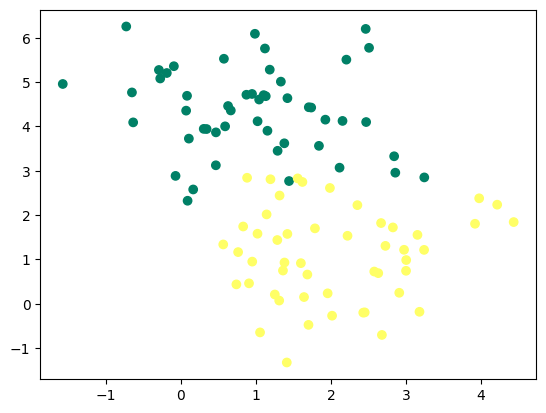

In [114]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

y = y.reshape((y.shape[0], 1))

print('dimensions de x:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [115]:
lim = 10
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)

W_f = np.c_[W11.ravel(), W22.ravel()].T

In [116]:
b = 0
Z = X.dot(W_f) + b
A = 1 / (1 + np.exp(-Z))

eps = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + eps) - (1 - y) * np.log(1 - A + eps), axis = 0).reshape(W11.shape)
L.shape

(100, 100)

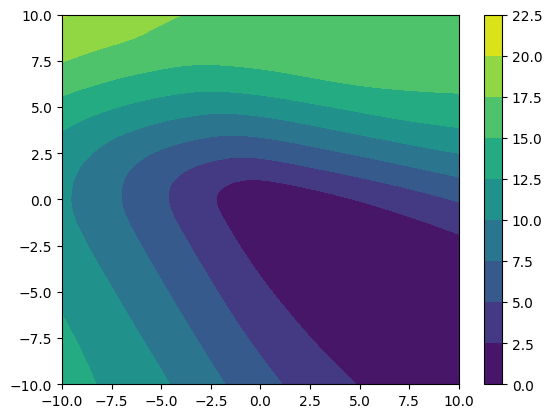

In [117]:
plt.contourf(W11, W22, L)
plt.colorbar()

0.92


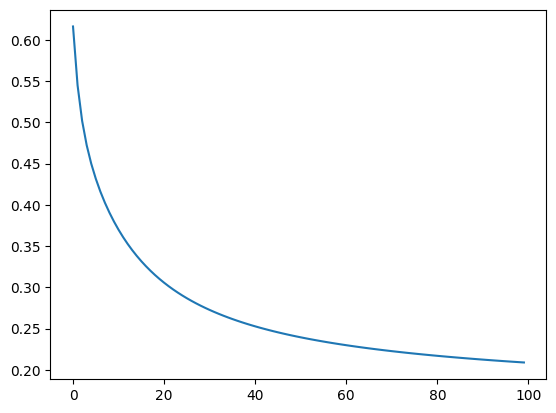

In [118]:
W, b = artificial_neuron(X, y)

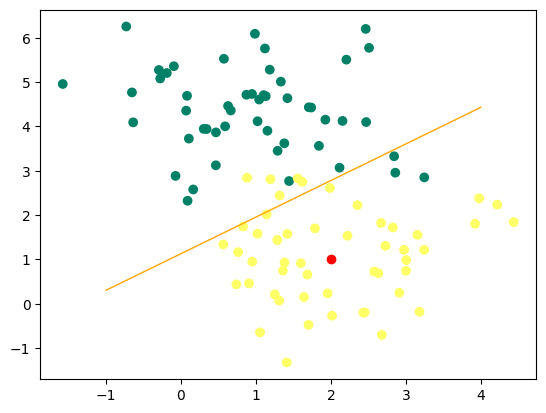

array([ True])

In [119]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = ( -W[0] * x0 - b ) / W[1]

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1] , c='r')
plt.plot(x0, x1, c='orange', lw=1)
plt.show()

predict(new_plant, W, b)

# **Exercice Chien/Chat**


In [120]:
import h5py

def load_data():
    train_dataset = h5py.File('./trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('./testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels

    return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = load_data()

In [121]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1)
X_train_reshape.shape

(1000, 4096)

In [122]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1)
X_test_reshape.shape

(200, 4096)

<ipython-input-107-99a4b9fa7eaf>:3: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))


0.51


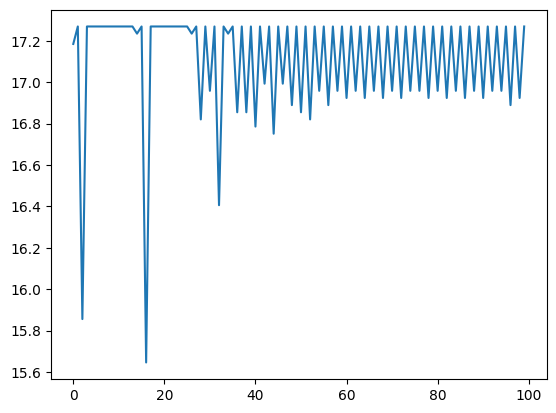

In [123]:
W, b = artificial_neuron(X_train_reshape, y_train)